In [1]:
import os
from pathlib import Path

base_dir = Path(os.getcwd()).parent

In [2]:
from transformers import AutoTokenizer
from src.utils.config_loader import load_config
from src.data.preprocessing import create_df
from src.data.dataset import Dataset

config = load_config(base_dir / 'model_params.yaml')

tokenizer = AutoTokenizer.from_pretrained(config['model']['model_name'])

data_df = create_df(base_dir / 'data/my_data/all_regplans.conllu')

data_df

,words,labels
0,"[Detaljregulering, ,, Solstad, boligfelt, ,, E...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[Reguleringsbestemmelser, for, Støperitomta, P...","[O, O, O, O, O, O]"
2,"[PLANBESTEMMELSER, Detaljregulering, for, Kjet...","[O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"[Reguleringsbestemmelser, for, Krossen, KROSSE...","[O, O, O, O, O, O, O, O, O]"
4,"[REGULERINGSBESTEMMELSER, ,, DETALJREGULERING,...","[O, O, O, O, O, O, O]"
...,...,...
2369,"[Det, skal, takast, kontakt, med, Universitets...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2370,"[Utgifter, i, samband, med, den, arkeologiske,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2371,"[10, ., FØRESEGNER]","[O, O, O]"
2372,"[TIL, DETALJREGULERING, HITTUN]","[O, O, O]"


In [3]:
import pandas as pd
import numpy as np

tokenized_lengths = []

for sentence in data_df['words']:  
    length = len(
        tokenizer.encode(
        sentence, 
        is_split_into_words=True, 
        add_special_tokens=True
        )
    )
    tokenized_lengths.append(length)

p_95 = int(np.percentile(tokenized_lengths, 95)) # 95th percentile

p_95

48

In [4]:
df = pd.DataFrame(tokenized_lengths)

df.describe()

,0
count,2374.000000
mean,20.489890
std,14.760274
min,2.000000
25%,9.000000
50%,18.000000
75%,27.000000
max,143.000000


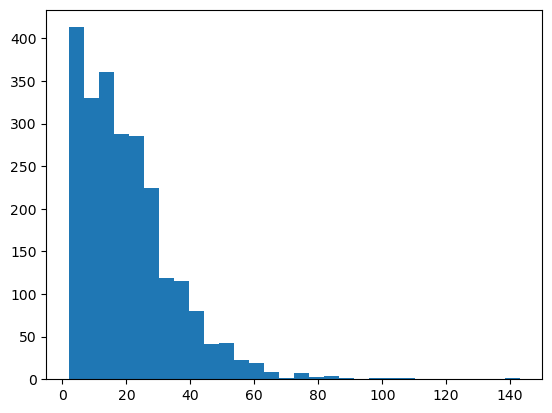

In [5]:
import matplotlib.pyplot as plt

plt.hist(df, bins=30)
plt.show()

In [6]:
# The distribution of entities

entity_counts = pd.Series([label for sublist in data_df['labels'] for label in sublist]).value_counts()

entity_counts

O         22466
B-FELT      739
I-FELT      110
Name: count, dtype: int64